# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

## Preparando o Ambiente

In [54]:
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [55]:
# Importando pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [56]:
# Importando a base de dados
tabela = pd.read_csv("advertising.csv")

# Analisando base de dados
display(tabela)
print(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


## Realizando Análise Exploratória

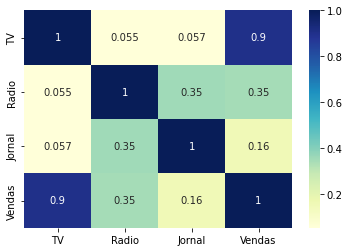

In [57]:
# Analisando correlação
# print(tabela.corr())

# Criando o gráfico heatmap da correlação
sns.heatmap(tabela.corr(), cmap="YlGnBu", annot=True)

# Exibindo gráfico
plt.show()

## Preparando os Dados Para Treinamento do Modelo de Machine Learning

In [58]:
# Separando os dados que vão ser utilizados para fazer a previsão
x = tabela[["TV", "Radio", "Jornal"]]
# Definindo a informação que deve ser prevista
y = tabela["Vendas"]

# Definindo valores de treinos e testes para a Inteligência Artificial
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

## Criando Modelos de Máquinas Preditivas

- LinearRegression (Regressão Linear)
- RandomForest (Árvore de Decisão)

In [59]:
# Criando duas inteligências artificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinando as inteligências artificiais
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

## Testando as Inteligências Artificiais

In [60]:
# Prevendo os testes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# Exibindo acurácia das máquinas preditivas
print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))


0.9071151423684273
0.9633548317371424


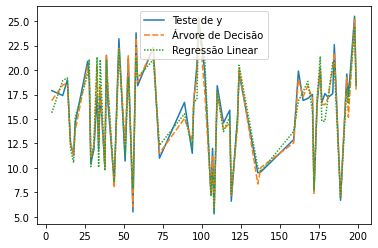

In [61]:
# Criando gráfico de acurácia das previsões
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["Teste de y"] = y_teste
tabela_auxiliar["Árvore de Decisão"] = previsao_arvoredecisao
tabela_auxiliar["Regressão Linear"] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show()

## Realizando uma Previsão com Modelo de Árvore de Decisão

In [62]:
# Definindo uma nova previsão para ser feita
novos = pd.read_csv("novos.csv")
display(novos)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [63]:
# Fazendo previsão com o melhor modelo testado
print(modelo_arvoredecisao.predict(novos))

[ 7.686  8.986 19.922]
